In [1]:
from sklearn.model_selection import train_test_split #para dividir sets de entrenamiendo y prueba

import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir 
import pandas as pd

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import argparse

from sklearn.metrics import roc_curve, RocCurveDisplay, auc, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def preprocessing(image):
    #image = 
    #image = cv2.resize(image, (512,512), interpolation= cv2.INTER_LINEAR)
    #return image
    pass

In [3]:
#images = []
#Leyendo las imagenes
'''for image_name in heart_db:
    image = img_image_as_float(io.imread(f'superpixels_images/{image_name}'))
    images.append(image)'''

#image = img_as_float(io.imread('ventriculo.jpeg'))
image = img_as_float(io.imread(f'imgs/1.bmp'))


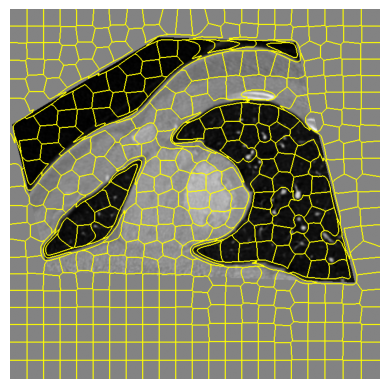

In [4]:
numSegments = 500
segments = slic(image, n_segments = numSegments, sigma = 5)
# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)

superpixels_image = mark_boundaries(image, segments)
ax.imshow(superpixels_image)
plt.axis("off")
# show the plots
plt.show()

In [5]:
def get_label(x,y, labels):
    return labels[y,x]

In [6]:
coords=[]
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(superpixels_image, str(x) + ',' +
                    str(y), (x, y), font,
                    0.3, (0, 255, 0), 1)
        cv2.imshow('image', superpixels_image)

    # checking for right mouse clicks
    if event == cv2.EVENT_RBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(superpixels_image, str(get_label(x,y,segments)),
                    (x, y), font, 0.3,
                    (255, 0, 255), 1)
        cv2.imshow('image', superpixels_image)
        coords.append([x,y])
    


In [7]:
cv2.imshow('image', superpixels_image)

# setting mouse handler for the image
# and calling the click_event() function

cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()


353   290
332   314
368   324
334   348
377   348
343   378
377   379


In [8]:
mask = np.zeros(image.shape[:2], dtype = "uint8")

for x,y in coords: 
    mask[segments == get_label(x,y, segments)] = 255

masked_image = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Applied",masked_image)
cv2.waitKey(0)

13

In [13]:
windows=[]
mean=[]
var=[]
skew=[]
kurt=[]
entropy=[]



error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1008: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'
